# Load data

In [1]:
include("..//src//Performance.jl");
using .Performance;
using Plots;
gr();

In [2]:
file_name::String = "..//data//mdl_add.xml";

km = 1000.;

@time pfm::Dict = initial_performance(file_name);

pfm

 12.484446 seconds (16.33 M allocations: 821.356 MiB, 3.36% gc time, 98.30% compilation time)


Dict{Symbol, Any} with 75 entries:
  :mach_far_alt               => Any[0.728857, 0.787096, 0.845854, 0.866362, 0.…
  :Vvmax_alt_func             => Spline1D(knots=[0.0,1500.0 … 13500.0,15000.0] …
  :VvAB_alt_mach_func         => VvAB
  :machAB_qc_alt_func         => Spline1D(knots=[0.0,1500.0 … 13500.0,15000.0] …
  :VvmaxAB_alt_func           => Spline1D(knots=[0.0,1500.0 … 13500.0,15000.0] …
  :Hmax0_practice             => 14709.0
  :transonic_mach_range       => LinRange{Float64}(0.2, 1.7, 100)
  :eta                        => [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0…
  :alpha0                     => [-0.029117, -0.0291075, -0.0290382, -0.0294515…
  :machAB_range_alt           => [0.0621126 1.09047; 0.123839 1.15249; … ; 0.52…
  :cfR_func_all               => cfR_func_all
  :transonic_mach_range_index => 1:12
  :Hmax0AB                    => 16770.6
  :CD0                        => [0.0246857, 0.0257608, 0.0243299, 0.0238042, 0…
  :cft_func                   => cft_func
  :ma

# 0. Atmosphere 大气模型

In [3]:
height_plot = LinRange(0, 20000, 1000);
T_plot = atm.T.(height_plot);
p_plot = atm.p.(height_plot);
rho_plot = atm.rho.(height_plot);
a_plot = atm.a.(height_plot);

## 0.1. 温度$T$

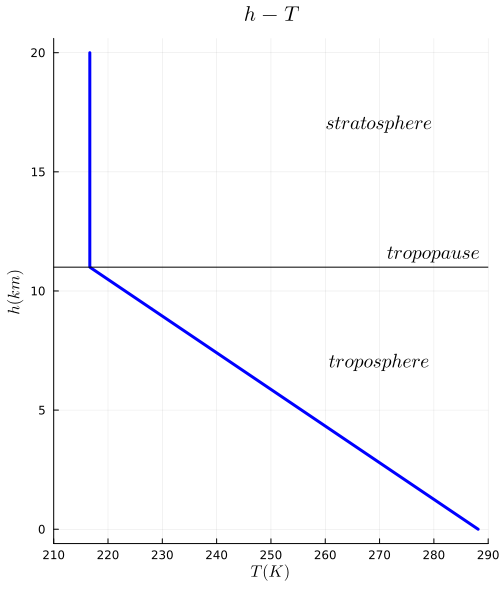

In [4]:
Tp = plot(size=(500, 600), dpi=200);

plot!(
    T_plot,
    height_plot / 1000,
    lw=3,
    color=:blue,
    label=""
)

plot!(
    [0, 300],
    [11, 11],
    label="",
    color=:black,
    lw=1
)

annotate!(
    270, 7,
    ("\$troposphere\$", :black, 13)
)
annotate!(
    270, 17,
    ("\$stratosphere\$", :black, 13)
)
annotate!(
    280, 11,
    ("\$tropopause\$", :black, 13, :bottom)
)

xticks!(LinRange(210, 300, 10));
xlims!(210, 290)
xlabel!("\$T(K)\$")
ylabel!("\$h(km)\$")
title!("\$h-T\$")

plot(Tp)

## 0.2. 压强$p$

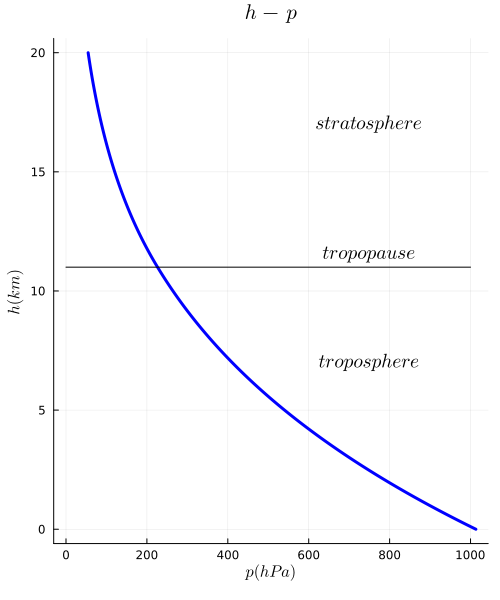

In [5]:
pp = plot(size=(500, 600), dpi=200);

plot!(
    p_plot / 100,
    height_plot / 1000,
    lw=3,
    color=:blue,
    label=""
)

plot!(
    [0, 1e3],
    [11, 11],
    label="",
    color=:black,
    lw=1
)

annotate!(
    7.5e2, 7,
    ("\$troposphere\$", :black, 13)
)
annotate!(
    7.5e2, 17,
    ("\$stratosphere\$", :black, 13)
)
annotate!(
    7.5e2, 11,
    ("\$tropopause\$", :black, 13, :bottom)
)

xticks!(LinRange(0, 1e3, 6));
# xlims!(210, 290)
xlabel!("\$p(hPa)\$")
ylabel!("\$h(km)\$")
title!("\$h-p\$")

plot(pp)

## 0.3. 密度$\rho$

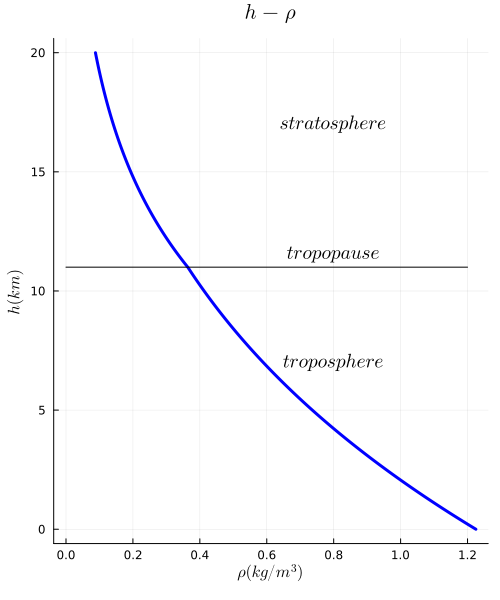

In [6]:
rhop = plot(size=(500, 600), dpi=200);

plot!(
    rho_plot ,
    height_plot / 1000,
    lw=3,
    color=:blue,
    label=""
)

plot!(
    [0, 1.2],
    [11, 11],
    label="",
    color=:black,
    lw=1
)

annotate!(
    0.8, 7,
    ("\$troposphere\$", :black, 13)
)
annotate!(
    0.8, 17,
    ("\$stratosphere\$", :black, 13)
)
annotate!(
    0.8, 11,
    ("\$tropopause\$", :black, 13, :bottom)
)

# xticks!(LinRange(0, 1e3, 6));
# xlims!(210, 290)
xlabel!("\$\\rho(kg/m^3)\$")
ylabel!("\$h(km)\$")
title!("\$h-\\rho\$")

plot(rhop)

## 0.4. 声速$a$

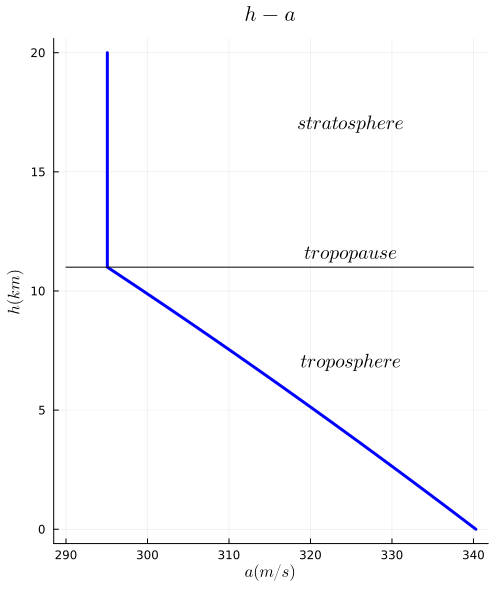

In [7]:
ap = plot(size=(500, 600), dpi=200);

plot!(
    a_plot ,
    height_plot / 1000,
    lw=3,
    color=:blue,
    label=""
)

plot!(
    [290, 340],
    [11, 11],
    label="",
    color=:black,
    lw=1
)

annotate!(
    325, 7,
    ("\$troposphere\$", :black, 13)
)
annotate!(
    325, 17,
    ("\$stratosphere\$", :black, 13)
)
annotate!(
    325, 11,
    ("\$tropopause\$", :black, 13, :bottom)
)

# xticks!(LinRange(0, 1e3, 6));
# xlims!(210, 290)
xlabel!("\$a(m/s)\$")
ylabel!("\$h(km)\$")
title!("\$h-a\$")

plot(ap)

## 0.5. 保存图片

In [8]:
savepath = "..//..//LATEX//image//ch2//"

if isdir(savepath) != true
    mkpath(savepath);
end

savefig(Tp, savepath * "T_distribution.png")
savefig(Tp, savepath * "T_distribution.pdf")

savefig(pp, savepath * "p_distribution.png")
savefig(pp, savepath * "p_distribution.pdf")

savefig(rhop, savepath * "rho_distribution.png")
savefig(rhop, savepath * "rho_distribution.pdf")

savefig(ap, savepath * "a_distribution.png")
savefig(ap, savepath * "a_distribution.pdf")

println("atmosphere finish");

atmosphere finish


# 1. lift and drag

## 1.1. $C_L-\alpha$ origin data

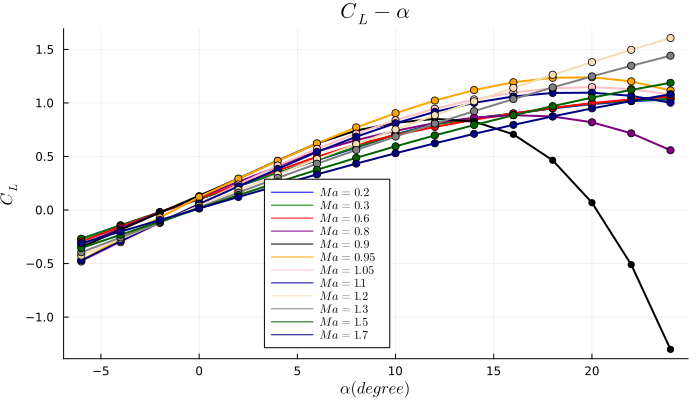

In [9]:
CL_alpha = plot(size=(700, 400), dpi=200)

for j = 1:length(pfm[:mach])
    plot!(
        pfm[:alpha_deg],
        pfm[:CL_base][j, :],
        color=colors[j],
        lw=2,
        label="\$Ma = $(pfm[:mach][j])\$",
        legend=:bottom
    )
    scatter!(
    pfm[:alpha_deg],
    pfm[:CL_base][j, :],
    color=colors[j],
    label=""
)
end

xlabel!("\$\\alpha (degree)\$");
ylabel!("\$C_L\$");
title!("\$C_L - \\alpha\$")

plot(CL_alpha)

 ## 1.2. $C_D - C_L$ origin data

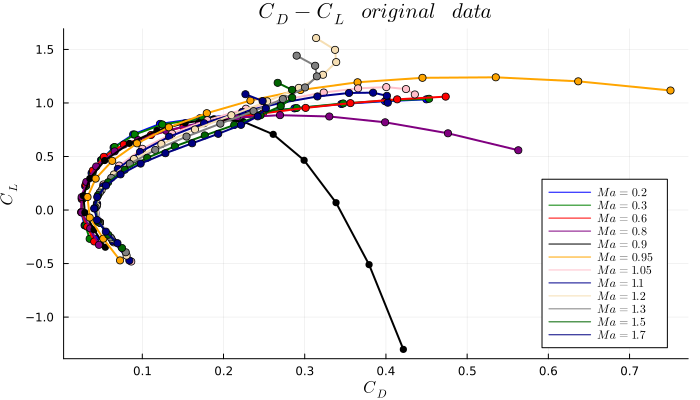

In [10]:
CLCD = plot(size=(700, 400), dpi=200)

for j = 1:length(pfm[:mach])
    plot!(
        pfm[:CD_base][j, :],
        pfm[:CL_base][j, :],
        color=colors[j],
        lw=2,
        label="\$Ma = $(pfm[:mach][j])\$",
        legend=:bottomright
    )
    scatter!(
    pfm[:CD_base][j, :],
    pfm[:CL_base][j, :],
    color=colors[j],
    label=""
)
end

xlabel!("\$C_D\$");
ylabel!("\$C_L\$");
title!("\$C_D-C_L\\quad original \\quad data\$")

plot(CLCD)

## 1.3. $C_{l\alpha}-Ma$

![](..//image/textbook/Clalpha_Ma.png)

  0.166306 seconds (257.17 k allocations: 13.075 MiB, 27.58% gc time, 99.94% compilation time)


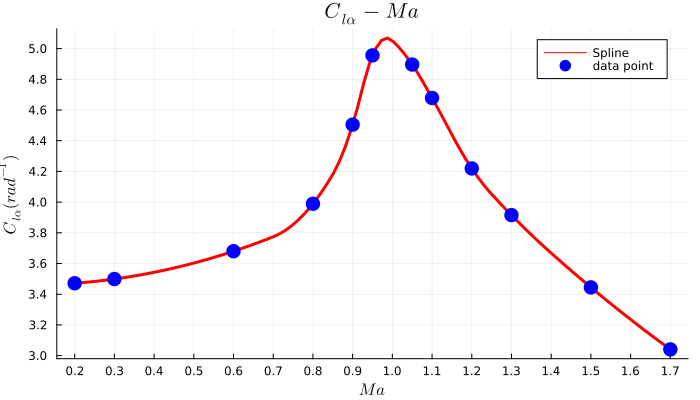

In [11]:
Clalpha_Ma = plot(size=(700, 400), dpi=200)

@time Ma_Clalpha_minor = spline_minor(pfm[:mach], pfm[:Clalpha])

plot!(
    Ma_Clalpha_minor[1],
    Ma_Clalpha_minor[2],
    color=:red,
    lw=3,
    label="Spline",
    legend=:topright
)

scatter!(
    pfm[:mach],
    pfm[:Clalpha],
    markerstrokewidth = 0,
    markersize=8,
    color=:blue,
    label="data point",
    legend=:topright
)

xlabel!("\$Ma\$");
ylabel!("\$C_{l\\alpha}(rad^{-1})\$");
title!("\$C_{l\\alpha}-Ma\$");

xticks!(LinRange(0.1, 1.8, 18));
yticks!(LinRange(3, 6, 16));

plot(Clalpha_Ma)

## 1.4. $C_{D0}--Ma$

![](..//image/textbook/CD0_Ma.png)

  0.000057 seconds (11 allocations: 3.828 KiB)


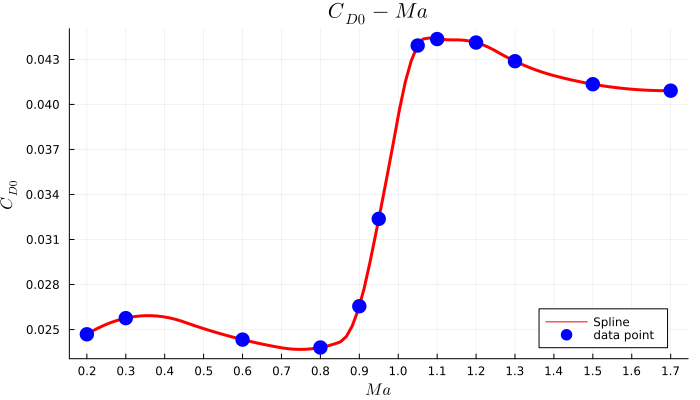

In [12]:
CD0_Ma = plot(size=(700, 400), dpi=200)

@time Ma_CD0_minor = spline_minor(pfm[:mach], pfm[:CD0])

plot!(
    Ma_CD0_minor[1],
    Ma_CD0_minor[2],
    color=:red,
    lw=3,
    label="Spline",
    legend=:bottomright
)

scatter!(
    pfm[:mach],
    pfm[:CD0],
    markerstrokewidth = 0,
    markersize=8,
    color=:blue,
    label="data point",
    legend=:bottomright
)

xlabel!("\$Ma\$");
ylabel!("\$C_{D0}\$");
title!("\$ C_{D0} -Ma \$");

xticks!(LinRange(0.1, 1.8, 18));
yticks!(LinRange(0.019, 0.049, 11));

plot(CD0_Ma)

## 1.5. $A-Ma$

![](..//image/textbook/A_Ma.png)

  0.000083 seconds (11 allocations: 3.828 KiB)


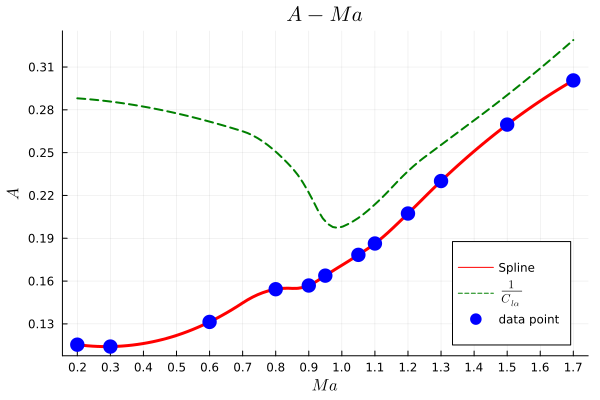

In [13]:
A_Ma = plot(size=(600, 400), dpi=200)

@time Ma_A_minor = spline_minor(pfm[:mach], pfm[:A])

plot!(
    Ma_A_minor[1],
    Ma_A_minor[2],
    color=:red,
    lw=3,
    label="Spline",
    legend=:bottomright
)

plot!(
    LinRange(0.2, 1.7, default_len),
    pfm[:Clalpha_func].(LinRange(0.2, 1.7, default_len)) .^ (-1),
    label="\$\\frac{1}{C_{l\\alpha}}\$",
    lw=2,
    color=:green,
    linestyle=:dash
)

scatter!(
    pfm[:mach],
    pfm[:A],
    markerstrokewidth = 0,
    markersize=8,
    color=:blue,
    label="data point",
    legend=:bottomright
)

xlabel!("\$Ma\$");
ylabel!("\$A\$");
title!("\$A-Ma\$");

xticks!(LinRange(0.1, 1.8, 18));
yticks!(LinRange(0.1, 0.40, 11));

plot(A_Ma)

## 1.6. Drag polar

![](..//image//textbook/Drag_Polar.png)

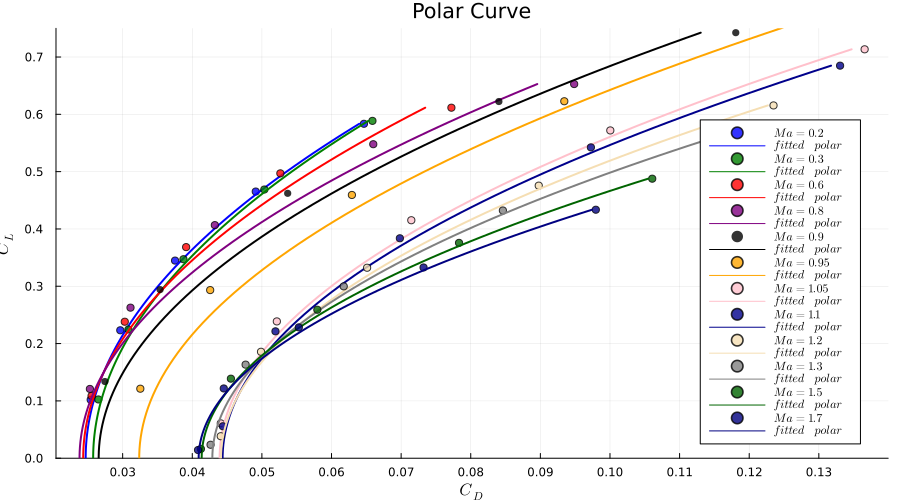

In [14]:
drag_polar = plot(size=(900, 500), dpi=200)
for i = pfm[:transonic_mach_range_index]
    scatter!(
        pfm[:CD_base][i, pfm[:alpha_fit_range_index]],
        pfm[:CL_base][i, pfm[:alpha_fit_range_index]],
        # markerstrokewidth = 0,
        ma = 0.8,
        label="\$Ma=$(pfm[:mach][i])\$",
        legend=:bottomright,
        color=colors[i+1 - pfm[:transonic_mach_range_index][1]],
    )
    plot!(
        polar_curve_function.(pfm[:CD0][i], pfm[:A][i], pfm[:CL_range][i]),
        pfm[:CL_range][i],
        label="\$fitted \\quad polar\$",
        legend=:bottomright,
        color=colors[i+1 - pfm[:transonic_mach_range_index][1]],
        lw=2
    )
end

xlabel!("\$ C_D \$");
ylabel!("\$ C_L \$");
title!("Polar Curve");

xticks!(LinRange(0, 0.14, 15));
ylims!(0, 0.75);
yticks!(LinRange(0, 0.9, 10));

plot(drag_polar)

## 1.7. 保存图片

In [15]:
savepath = "..//..//LATEX//image//ch3//"

if isdir(savepath) != true
    mkpath(savepath);
end

savefig(CL_alpha, savepath * "CL_alpha_origin.png");
savefig(CL_alpha, savepath * "CL_alpha_origin.pdf");

savefig(CLCD, savepath * "CLCD_origin.png");
savefig(CLCD, savepath * "CLCD_origin.pdf");

savefig(Clalpha_Ma, savepath * "Clalpha_Ma.png");
savefig(Clalpha_Ma, savepath * "Clalpha_Ma.pdf");

savefig(CD0_Ma, savepath * "CD0_Ma.png");
savefig(CD0_Ma, savepath * "CD0_Ma.pdf");

savefig(A_Ma, savepath * "A_Ma.png");
savefig(A_Ma, savepath * "A_Ma.pdf");

savefig(drag_polar, savepath * "drag_polar.png");
savefig(drag_polar, savepath * "drag_polar.pdf");

println("lift and drag finish");

lift and drag finish


# 2. 推力曲线

## 2.1. 需用推力曲线$T_R$

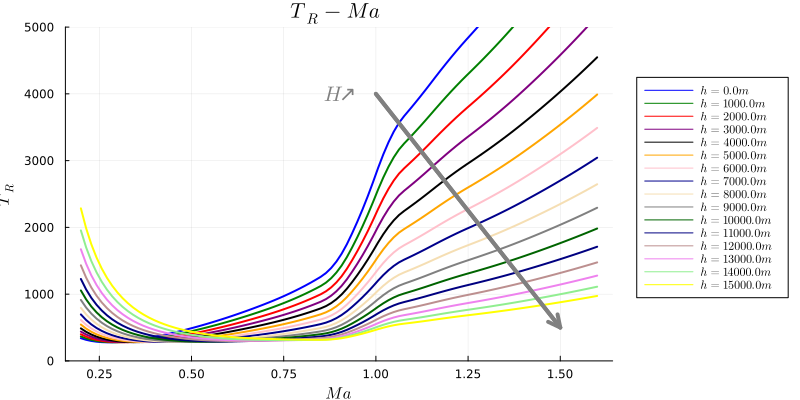

In [16]:
mach_range = [0.2, 1.6];

mach_plot = LinRange(mach_range[1], mach_range[2], default_len);

mach_plot11 = LinRange(mach_range[1], maximum(pfm[:machth]), default_len);
mach_plot12 = LinRange(maximum(pfm[:machth]), mach_range[2], default_len);

mach_plot21 = LinRange(mach_range[1], minimum(pfm[:machthAB]), default_len);
mach_plot22 = LinRange(minimum(pfm[:machthAB]), mach_range[2], default_len);

# height_plot = LinRange(10000, 15000, 6);
height_plot = pfm[:alt_m];
TR = pfm[:thrust_require_func].( height_plot, transpose(mach_plot) );

H_TR_Ma = plot(size=(800, 400), dpi=200)

for i = 1:length(pfm[:alt_m])
    plot!(
        mach_plot, 
        TR[i, :],
        color=colors[i],
        label="\$h=$(pfm[:alt_m][i])m\$",
        legend=:outerright,
        lw=2
    )
end

plot!(
    [1, 1.5],
    [4000, 500],
    color=:grey,
    lw=4,
    arrow=true,
    label=""
)

annotate!(
    0.9, 4000,
    ("\$H \$↗", :grey)
)

xlabel!("\$ Ma \$");
ylabel!("\$ T_R \$");
ylims!(0, 5000)
title!("\$T_R-Ma\$ ")

plot(H_TR_Ma)

## 2.2. 可用推力曲线

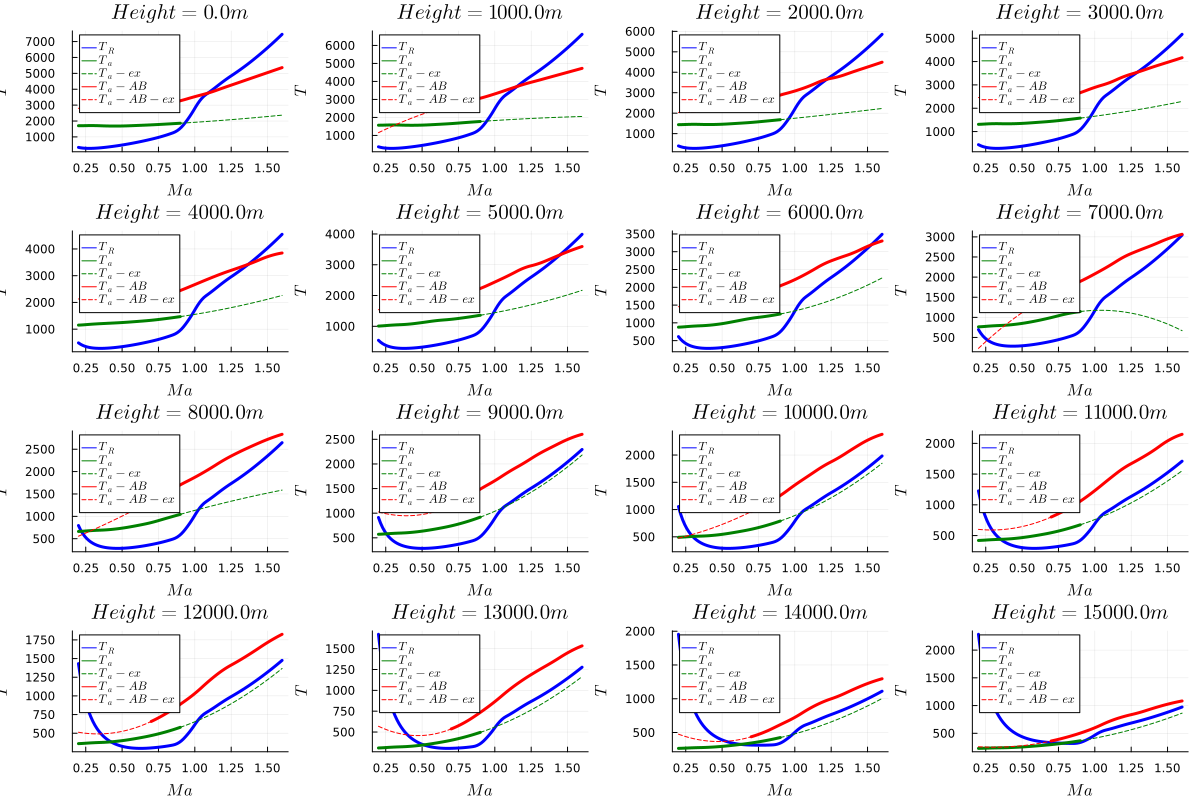

In [17]:
Ta1 = pfm[:thrust_available_func].( height_plot, transpose(mach_plot11) );
Ta2 = pfm[:thrust_available_func].( height_plot, transpose(mach_plot12) );

TaAB1 = pfm[:thrustAB_available_func].( height_plot, transpose(mach_plot21) );
TaAB2 = pfm[:thrustAB_available_func].( height_plot, transpose(mach_plot22) );

h_TaTR_Ma = []

for j = 1:length(pfm[:alt_m])
    push!(h_TaTR_Ma, plot(dpi=200));

    plot!(
        mach_plot,
        TR[j, :],
        color=:blue,
        label="\$T_R\$",
        lw=3
    );

    plot!(
        mach_plot11,
        Ta1[j, :],
        color=:green,
        label="\$T_a\$",
        lw=3
    );
    plot!(
        mach_plot12,
        Ta2[j, :],
        color=:green,
        label="\$T_a - ex\$",
        linestyle=:dash
    );

    plot!(
        mach_plot22,
        TaAB2[j, :],
        color=:red,
        label="\$T_a - AB\$",
        lw=3
    );
    plot!(
        mach_plot21,
        TaAB1[j, :],
        color=:red,
        label="\$T_a - AB - ex\$",
        linestyle=:dash,
        legend=:topleft
    )

    xlabel!("\$Ma\$");
    ylabel!("\$T\$");
    title!("\$Height=$(height_plot[j])m\$");

end

plot(
    h_TaTR_Ma[1], h_TaTR_Ma[2],
    h_TaTR_Ma[3], h_TaTR_Ma[4],
    h_TaTR_Ma[5], h_TaTR_Ma[6],
    h_TaTR_Ma[7], h_TaTR_Ma[8],
    h_TaTR_Ma[9], h_TaTR_Ma[10],
    h_TaTR_Ma[11], h_TaTR_Ma[12],
    h_TaTR_Ma[13], h_TaTR_Ma[14],
    h_TaTR_Ma[15], h_TaTR_Ma[16],
    layout=(4, 4),
    size=(1200, 800)
)

## 2.3.保存图片

In [18]:
savepath = "..//..//LATEX//image//ch4//"

if isdir(savepath) != true
    mkpath(savepath);
end

savefig(H_TR_Ma, savepath * "H_TR_Ma.png");
savefig(H_TR_Ma, savepath * "H_TR_Ma.pdf");

for j = 1:length(h_TaTR_Ma)
    savefig(h_TaTR_Ma[j], savepath * "h_TaTR_Ma$j.png");
    savefig(h_TaTR_Ma[j], savepath * "h_TaTR_Ma$j.pdf");
end

println("Thrust finish!");

Thrust finish!


# 3. 速度特性

## 3.1. 飞行包线

![](..//image/textbook/envelope.png)

### 3.1.1. 飞行包线--$Ma$

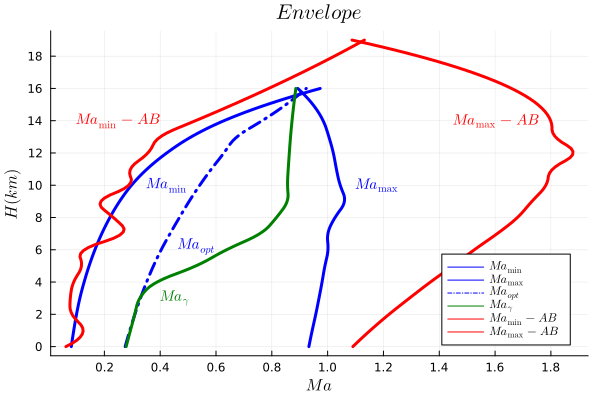

In [19]:
height_envelope1 = LinRange(0., 16000, default_len);
height_envelope2 = LinRange(0., 19000, default_len);

envelope = plot(size=(600, 400), dpi=200);

plot!(
    pfm[:mach_min_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{\\min}\$"
)

plot!(
    pfm[:mach_max_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{\\max}\$"
)

plot!(
    pfm[:mach_opt_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{opt}\$",
    linestyle=:dashdot
);

plot!(
    pfm[:mach_gamma_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:green,
    label="\$Ma_{\\gamma}\$"
)



plot!(
    pfm[:machAB_min_alt_func].(height_envelope2),
    height_envelope2 ./ km,
    color=:red,
    lw=3,
    label="\$Ma_{\\min}-AB\$"
)

plot!(
    pfm[:machAB_max_alt_func].(height_envelope2),
    height_envelope2 ./ km,
    lw=3,
    color=:red,
    legend=:bottomright,
    label="\$Ma_{\\max}-AB\$"
)

# plot!(
#     pfm[:machAB_opt_alt_func].(height_envelope2),
#     height_envelope2 ./ km,
#     lw=3,
#     color=:red,
#     label="\$Ma_{opt}-AB\$",
#     linestyle=:dash
# )

annotate!(
    1.1, 10,
    ("\$Ma_{\\max}\$", :blue, 10, :left)
);
annotate!(
    0.35, 10,
    ("\$Ma_{\\min}\$", :blue, 10, :left)
);
annotate!(
    0.6, 6.2,
    ("\$Ma_{opt}\$", :blue, 10, :right)
);
annotate!(
    0.4, 14,
    ("\$Ma_{\\min}-AB\$", :red, 10, :right)
);
annotate!(
    1.45, 14,
    ("\$Ma_{\\max}-AB\$", :red, 10, :left)
);

annotate!(
    0.4, 3,
    ("\$Ma_{\\gamma}\$", :green, 10, :left)
);

xticks!(LinRange(0, 1.8, 10))
yticks!(LinRange(0, 20, 11))

xlabel!("\$ Ma \$");
ylabel!("\$ H(km) \$")
title!("\$Envelope\$")

plot(envelope)

### 3.1.2. 飞行包线--$V$

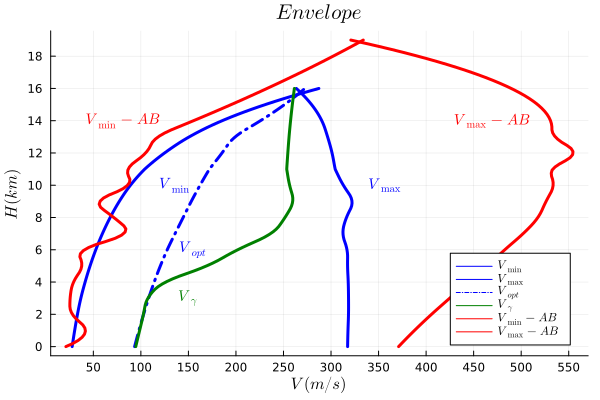

In [20]:
envelope_V = plot(size=(600, 400), dpi=200)

plot!(
    pfm[:mach_min_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{\\min}\$"
)

plot!(
    pfm[:mach_max_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{\\max}\$"
)

plot!(
    pfm[:mach_opt_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{opt}\$",
    linestyle=:dashdot
)
plot!(
    pfm[:mach_gamma_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:green,
    label="\$V_{\\gamma}\$"
)



plot!(
    pfm[:machAB_min_alt_func].(height_envelope2) .* atm.a.(height_envelope2),
    height_envelope2 ./ km,
    color=:red,
    lw=3,
    label="\$V_{\\min}-AB\$"
)

plot!(
    pfm[:machAB_max_alt_func].(height_envelope2) .* atm.a.(height_envelope2),
    height_envelope2 ./ km,
    lw=3,
    color=:red,
    legend=:bottomright,
    label="\$V_{\\max}-AB\$"
)

annotate!(
    340, 10,
    ("\$V_{\\max}\$", :blue, 10, :left)
);
annotate!(
    120, 10,
    ("\$V_{\\min}\$", :blue, 10, :left)
);
annotate!(
    170, 6,
    ("\$V_{opt}\$", :blue, 10, :right)
);
annotate!(
    120, 14,
    ("\$V_{\\min}-AB\$", :red, 10, :right)
);
annotate!(
    430, 14,
    ("\$V_{\\max}-AB\$", :red, 10, :left)
);

annotate!(
    140, 3,
    ("\$V_{\\gamma}\$", :green, 10, :left)
);

xticks!(LinRange(0, 600, 13))
yticks!(LinRange(0, 20, 11))

xlabel!("\$ V(m/s) \$");
ylabel!("\$ H(km) \$")
title!("\$Envelope\$")

plot(envelope_V)

## 3.2. $V_v$ at all h

![](..//image/textbook/Vv.png)

### 3.2.1. $V_v$ at all h not AB

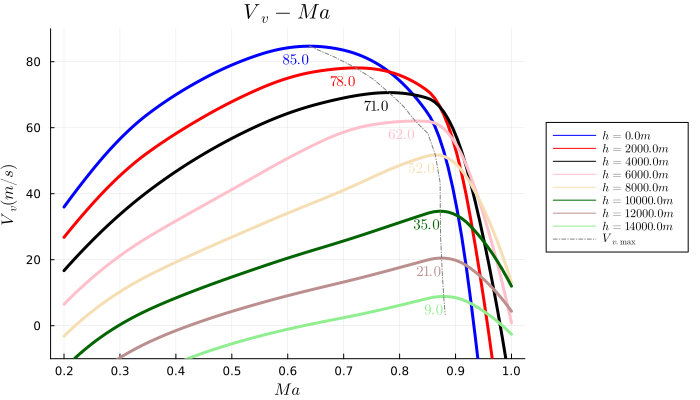

In [21]:
mach_plot = LinRange(0.2, 1., default_len);

Vv_plot = pfm[:Vv_alt_mach_func].(pfm[:alt_m], transpose(mach_plot));

Vv = plot(size=(700, 400), dpi=200)

skip = 2;

for i in 1:skip:length(pfm[:alt_m])
    plot!(
        mach_plot, Vv_plot[i, :],
        color=colors[i],
        legend=:outerright,
        lw=3,
        label="\$ h=$( pfm[:alt_m][i] ) m \$"
    )

    annotate!(
        pfm[:mach_qc_alt][i],
        pfm[:Vvmax_alt][i] .- 4,
        ("\$ $(round(pfm[:Vvmax_alt][i])) \$", colors[i], 10, :right)
    )

end

plot!(
    pfm[:mach_qc_alt],
    pfm[:Vvmax_alt],
    label="\$V_{v.\\max}\$",
    color=:grey,
    linestyle=:dashdot,
    lw=1
);

ylims!(-10, 90);
xticks!(LinRange(0.2, 1.1, 10));
xlabel!("\$ Ma \$");
ylabel!("\$ V_v (m/s) \$");
title!("\$ V_v-Ma \$")

plot(Vv)

### 3.2.2. $V_v$ at all h AB

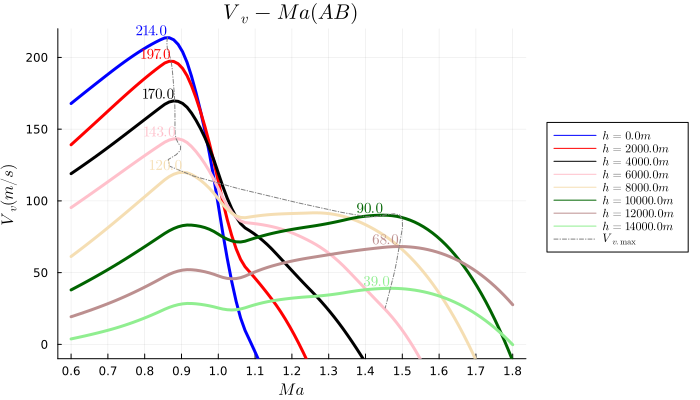

In [22]:
mach_plot = LinRange(0.6, 1.8, default_len);
VvAB_plot = pfm[:VvAB_alt_mach_func].(pfm[:alt_m], transpose(mach_plot));

VvAB = plot(size=(700, 400), dpi=200)

for i in 1:skip:length(pfm[:alt_m])
    plot!(
        mach_plot, VvAB_plot[i, :],
        color=colors[i],
        legend=:outerright,
        lw=3,
        label="\$ h=$( pfm[:alt_m][i] ) m \$"
    )

    annotate!(
        pfm[:machAB_qc_alt][i],
        pfm[:VvmaxAB_alt][i] .+ 5,
        ("\$ $(round(pfm[:VvmaxAB_alt][i])) \$", colors[i], 10, :right)
    )
end

h_plot = 0:300.:15000.;
maqcab = pfm[:machAB_qc_alt_func].(h_plot);
Vvab = pfm[:VvmaxAB_alt_func].(h_plot);

plot!(
    maqcab,
    Vvab,
    label="\$V_{v.\\max}\$",
    color=:grey,
    linestyle=:dashdot,
    lw=1
);

ylims!(-10, 220);
xticks!(LinRange(0.6, 1.8, 13));
xlabel!("\$ Ma \$");
ylabel!("\$ V_v (m/s) \$");
title!("\$ V_v-Ma (AB)\$")

plot(VvAB)

## 3.3. Contours of $V_v$

![](..//image/textbook/Vvcontour.png)

### 3.3.1. SEP云图（not AB）

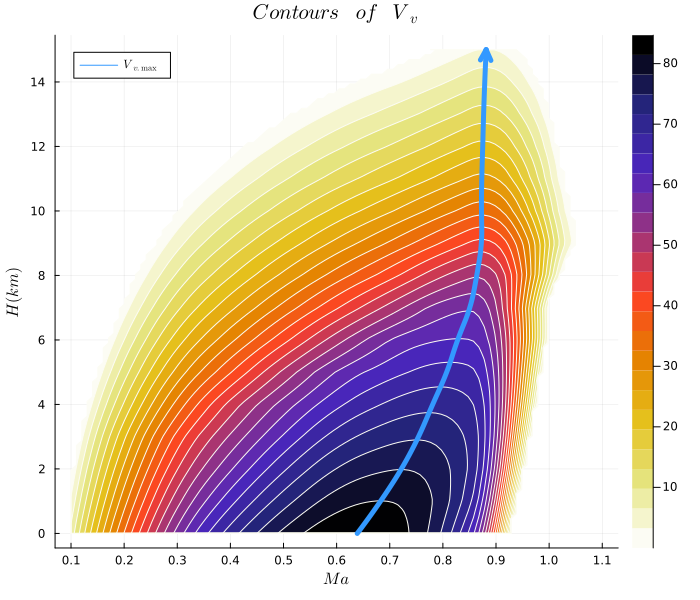

In [23]:
mach_plot = LinRange(0.1, 1.1, default_len);
height_plot = LinRange(0, 15000., default_len);

machqc_plot = pfm[:mach_qc_alt_func].(height_plot)
Vv_plot = pfm[:Vv_alt_mach_func].(height_plot, transpose(mach_plot));

pos = findall(x->x<=0, Vv_plot);
Vv_plot[pos] .= NaN;

Contour_Vv = plot(size=(700, 600))

contourf!(
    mach_plot, height_plot / km, Vv_plot,
    levels=25,
    color=cgrad(:CMRmap, rev=true)
)

plot!(
    machqc_plot,
    height_plot / km,
    arrow=true,
    lw=5,
    color=RGB(0.2, 0.6, 1),
    # color=:red,
    label="\$ V_{v.\\max} \$",
    legend=:topleft
)

xlabel!("\$ Ma \$");
ylabel!("\$ H(km) \$");
title!("\$ Contours \\quad of \\quad V_{v}\$");
xticks!(LinRange(0, 1.1, 12));
yticks!(0:2:16)

plot(Contour_Vv)

### 3.3.2. SEP云图(AB)

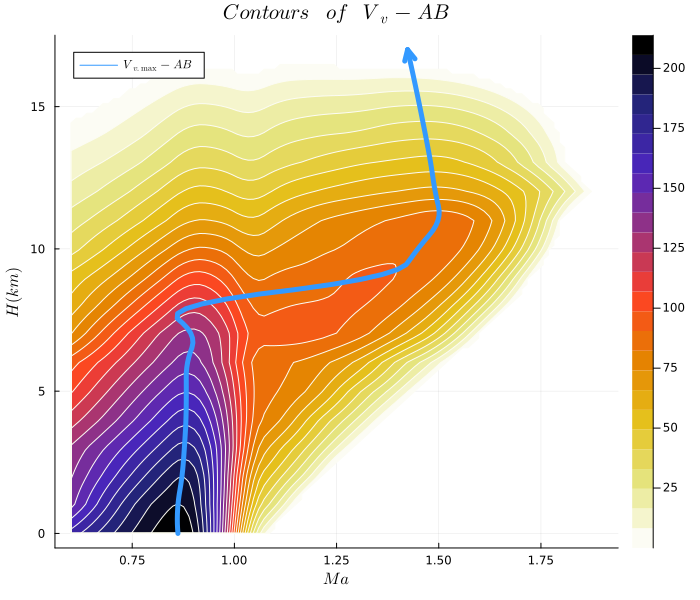

In [24]:
mach_plot = LinRange(0.6, 1.9, default_len);
height_plot = LinRange(0, 17000., default_len);
Vv_plot = pfm[:VvAB_alt_mach_func].(height_plot, transpose(mach_plot));

machqc_plot = pfm[:machAB_qc_alt_func].(height_plot)
pos = findall(x->x<=0, Vv_plot);
Vv_plot[pos] .= NaN;

Contour_VvAB = plot(size=(700, 600))

contourf!(
    mach_plot, height_plot / km, Vv_plot,
    levels=25,
    color=cgrad(:CMRmap, rev=true)
)

plot!(
    machqc_plot,
    height_plot / km,
    arrow=true,
    lw=5,
    color=RGB(0.2, 0.6, 1),
    label="\$ V_{v.\\max} -AB\$",
    legend=:topleft
)

xlabel!("\$ Ma \$");
ylabel!("\$ H(km) \$")
title!("\$ Contours \\quad of \\quad V_{v}-AB\$")

plot(Contour_VvAB)

## 3.4. $H_{\max}$升限

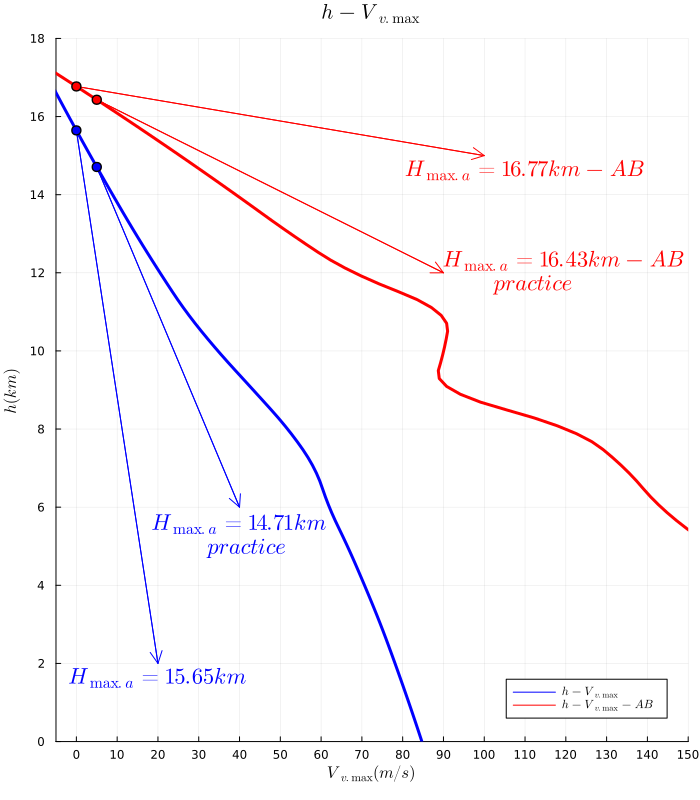

In [25]:
Vvmax_H = plot(size=(700, 800))

height_plot = LinRange(0, 20000, default_len);

plot!(
    pfm[:Vvmax_alt_func].(height_plot),
    height_plot ./ km,
    lw=3,
    color=:blue,
    label="\$h - V_{v.\\max}\$"
)

plot!(
    pfm[:VvmaxAB_alt_func].(height_plot),
    height_plot ./ km,
    lw=3,
    color=:red,
    label="\$h - V_{v.\\max}-AB\$",
    legend=:bottomright
)

plot!(
    [0, 20],
    [pfm[:Hmax0], 2000] ./ km,
    lw=1,
    # linestyle=:dashdot,
    color=:blue,
    label="",
    arrow=true
)
annotate!(
    20, 2000 / km,
    ("\$H_{\\max .a}=$(round(pfm[:Hmax0]/km; digits=2)) km\$", :top, :blue, 15)
)

plot!(
    [5, 40],
    [pfm[:Hmax0_practice], 6000] ./ km,
    lw=1,
    # linestyle=:dash,
    color=:blue,
    label="",
    arrow=:blue
)
annotate!(
    40, 6000 / km,
    ("\$H_{\\max .a}=$(round(pfm[:Hmax0_practice]/km; digits=2)) km\$\n  \$practice\$", :top, :blue, 15)
)

scatter!(
    [0, 5],
    [pfm[:Hmax0], pfm[:Hmax0_practice]] ./ km,
    color=:blue,
    markersize=5,
    label=""
)



plot!(
    [0, 100],
    [pfm[:Hmax0AB], 15000] ./ km,
    lw=1,
    # linestyle=:dashdot,
    color=:red,
    label="",
    arrow=true
)
annotate!(
    110, 15000 / km ,
    ("\$H_{\\max .a}=$(round(pfm[:Hmax0AB]/km; digits=2)) km-AB\$", :top, :red, 15)
)

plot!(
    [5, 90],
    [pfm[:Hmax0AB_practice], 12000] ./ km,
    lw=1,
    # linestyle=:dash,
    color=:red,
    label="",
    arrow=true
)
annotate!(
    90, 12000 / km ,
    ("\$H_{\\max .a}=$(round(pfm[:Hmax0AB_practice]/km; digits=2)) km-AB\$\n       \$practice\$", :left, :red, 15)
)

scatter!(
    [0, 5],
    [pfm[:Hmax0AB], pfm[:Hmax0AB_practice]] ./ km,
    color=:red,
    markersize=5,
    label=""
)


xlims!(-5, 150);
ylims!(0, 18);
xlabel!("\$ V_{v.\\max} (m/s) \$")
ylabel!("\$ h(km)\$")
xticks!(LinRange(0, 150, 16));
yticks!(LinRange(0, 18, 10));
title!("\$h-V_{v.\\max}\$")

plot(Vvmax_H)

## 3.5. 飞行包线中的快升速度

### 3.5.1. 飞行包线中的快升速度-$Ma$

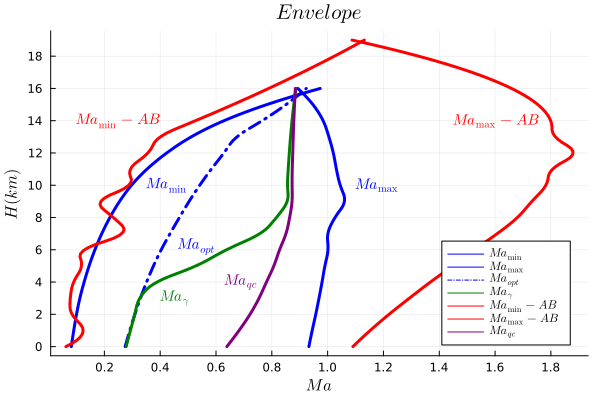

In [26]:
height_envelope1 = LinRange(0., 16000, default_len);
height_envelope2 = LinRange(0., 19000, default_len);

envelope_qc = plot(size=(600, 400), dpi=200);

plot!(
    pfm[:mach_min_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{\\min}\$"
)

plot!(
    pfm[:mach_max_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{\\max}\$"
)

plot!(
    pfm[:mach_opt_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{opt}\$",
    linestyle=:dashdot
);

plot!(
    pfm[:mach_gamma_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:green,
    label="\$Ma_{\\gamma}\$"
)



plot!(
    pfm[:machAB_min_alt_func].(height_envelope2),
    height_envelope2 ./ km,
    color=:red,
    lw=3,
    label="\$Ma_{\\min}-AB\$"
)

plot!(
    pfm[:machAB_max_alt_func].(height_envelope2),
    height_envelope2 ./ km,
    lw=3,
    color=:red,
    legend=:bottomright,
    label="\$Ma_{\\max}-AB\$"
)

plot!(
    pfm[:mach_qc_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:purple,
    label="\$Ma_{qc}\$"
)

# plot!(
#     pfm[:machAB_opt_alt_func].(height_envelope2),
#     height_envelope2 ./ km,
#     lw=3,
#     color=:red,
#     label="\$Ma_{opt}-AB\$",
#     linestyle=:dash
# )

annotate!(
    1.1, 10,
    ("\$Ma_{\\max}\$", :blue, 10, :left)
);
annotate!(
    0.35, 10,
    ("\$Ma_{\\min}\$", :blue, 10, :left)
);
annotate!(
    0.6, 6.2,
    ("\$Ma_{opt}\$", :blue, 10, :right)
);
annotate!(
    0.4, 14,
    ("\$Ma_{\\min}-AB\$", :red, 10, :right)
);
annotate!(
    1.45, 14,
    ("\$Ma_{\\max}-AB\$", :red, 10, :left)
);

annotate!(
    0.4, 3,
    ("\$Ma_{\\gamma}\$", :green, 10, :left)
);
annotate!(
    0.63, 4,
    ("\$Ma_{qc}\$", :purple, 10, :left)
);

xticks!(LinRange(0, 1.8, 10))
yticks!(LinRange(0, 20, 11))

xlabel!("\$ Ma \$");
ylabel!("\$ H(km) \$")
title!("\$Envelope\$")

plot(envelope_qc)

### 3.5.2. 飞行包线中的快升速度-$V$

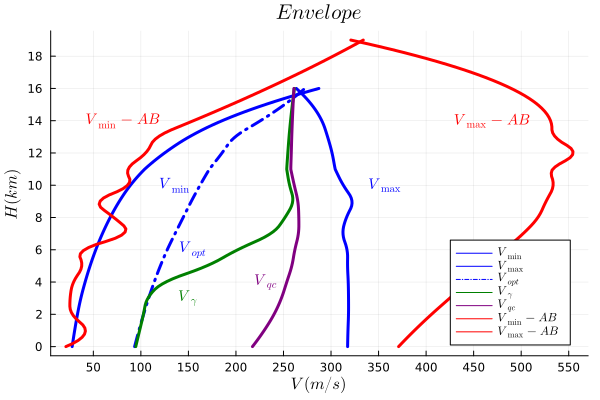

In [27]:
envelope_V_qc = plot(size=(600, 400), dpi=200)

plot!(
    pfm[:mach_min_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{\\min}\$"
)

plot!(
    pfm[:mach_max_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{\\max}\$"
)

plot!(
    pfm[:mach_opt_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{opt}\$",
    linestyle=:dashdot
)
plot!(
    pfm[:mach_gamma_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:green,
    label="\$V_{\\gamma}\$"
)
plot!(
    pfm[:mach_qc_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:purple,
    label="\$V_{qc}\$"
)



plot!(
    pfm[:machAB_min_alt_func].(height_envelope2) .* atm.a.(height_envelope2),
    height_envelope2 ./ km,
    color=:red,
    lw=3,
    label="\$V_{\\min}-AB\$"
)

plot!(
    pfm[:machAB_max_alt_func].(height_envelope2) .* atm.a.(height_envelope2),
    height_envelope2 ./ km,
    lw=3,
    color=:red,
    legend=:bottomright,
    label="\$V_{\\max}-AB\$"
)

annotate!(
    340, 10,
    ("\$V_{\\max}\$", :blue, 10, :left)
);
annotate!(
    120, 10,
    ("\$V_{\\min}\$", :blue, 10, :left)
);
annotate!(
    170, 6,
    ("\$V_{opt}\$", :blue, 10, :right)
);
annotate!(
    120, 14,
    ("\$V_{\\min}-AB\$", :red, 10, :right)
);
annotate!(
    430, 14,
    ("\$V_{\\max}-AB\$", :red, 10, :left)
);

annotate!(
    140, 3,
    ("\$V_{\\gamma}\$", :green, 10, :left)
);
annotate!(
    220, 4,
    ("\$V_{qc}\$", :purple, 10, :left)
);

xticks!(LinRange(0, 600, 13))
yticks!(LinRange(0, 20, 11))

xlabel!("\$ V(m/s) \$");
ylabel!("\$ H(km) \$")
title!("\$Envelope\$")

plot(envelope_V_qc)

## 3.6. 保存图片

In [28]:
savepath = "..//..//LATEX//image//ch5//"

if isdir(savepath) != true
    mkpath(savepath);
end

savefig(envelope, savepath * "envelope.png")
savefig(envelope, savepath * "envelope.pdf")

savefig(envelope_V, savepath * "envelope_V.png")
savefig(envelope_V, savepath * "envelope_V.pdf")

savefig(Vv, savepath * "Vv_at_all_h.png");
savefig(Vv, savepath * "Vv_at_all_h.pdf");

savefig(VvAB, savepath * "VvAB_at_all_h.png");
savefig(VvAB, savepath * "VvAB_at_all_h.pdf");

savefig(Contour_Vv, savepath * "Contour_Vv.png");
savefig(Contour_Vv, savepath * "Contour_Vv.pdf");

savefig(Contour_VvAB, savepath * "Contour_VvAB.png");
savefig(Contour_VvAB, savepath * "Contour_VvAB.pdf");

savefig(Vvmax_H, savepath * "Vvmax_H.png");
savefig(Vvmax_H, savepath * "Vvmax_H.pdf");

savefig(envelope_qc, savepath * "envelope_qc.png");
savefig(envelope_qc, savepath * "envelope_qc.pdf");

savefig(envelope_V_qc, savepath * "envelope_V_qc.png");
savefig(envelope_V_qc, savepath * "envelope_V_qc.pdf");

println("V character finish!");

V character finish!


# 4. 续航性能

## 4.1. 飞行包线中的久航远航

### 4.1.1. 飞行包线中的久航远航-$Ma$

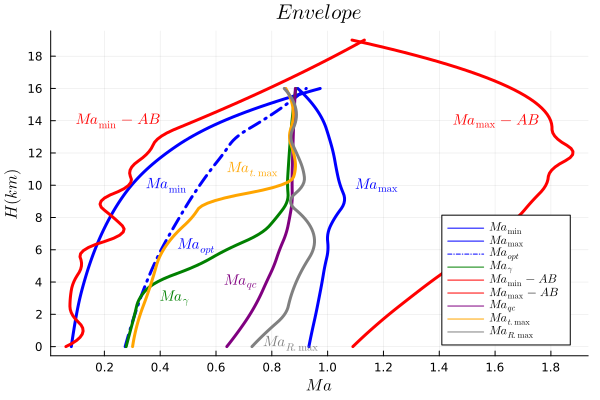

In [40]:
height_envelope1 = LinRange(0., 16000, default_len);
height_envelope2 = LinRange(0., 19000, default_len);

envelope_RT = plot(size=(600, 400), dpi=200);

plot!(
    pfm[:mach_min_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{\\min}\$"
)

plot!(
    pfm[:mach_max_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{\\max}\$"
)

plot!(
    pfm[:mach_opt_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$Ma_{opt}\$",
    linestyle=:dashdot
);

plot!(
    pfm[:mach_gamma_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:green,
    label="\$Ma_{\\gamma}\$"
)



plot!(
    pfm[:machAB_min_alt_func].(height_envelope2),
    height_envelope2 ./ km,
    color=:red,
    lw=3,
    label="\$Ma_{\\min}-AB\$"
)

plot!(
    pfm[:machAB_max_alt_func].(height_envelope2),
    height_envelope2 ./ km,
    lw=3,
    color=:red,
    legend=:bottomright,
    label="\$Ma_{\\max}-AB\$"
)

plot!(
    pfm[:mach_qc_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:purple,
    label="\$Ma_{qc}\$"
)

plot!(
    pfm[:mach_long_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:orange,
    legend=:bottomright,
    label="\$Ma_{t.\\max}\$"
)

plot!(
    pfm[:mach_far_alt_func].(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:gray,
    legend=:bottomright,
    label="\$Ma_{R.\\max}\$"
)
# plot!(
#     pfm[:machAB_opt_alt_func].(height_envelope2),
#     height_envelope2 ./ km,
#     lw=3,
#     color=:red,
#     label="\$Ma_{opt}-AB\$",
#     linestyle=:dash
# )

annotate!(
    1.1, 10,
    ("\$Ma_{\\max}\$", :blue, 10, :left)
);
annotate!(
    0.35, 10,
    ("\$Ma_{\\min}\$", :blue, 10, :left)
);
annotate!(
    0.6, 6.2,
    ("\$Ma_{opt}\$", :blue, 10, :right)
);
annotate!(
    0.4, 14,
    ("\$Ma_{\\min}-AB\$", :red, 10, :right)
);
annotate!(
    1.45, 14,
    ("\$Ma_{\\max}-AB\$", :red, 10, :left)
);

annotate!(
    0.4, 3,
    ("\$Ma_{\\gamma}\$", :green, 10, :left)
);
annotate!(
    0.63, 4,
    ("\$Ma_{qc}\$", :purple, 10, :left)
);

annotate!(
    0.64, 11,
    ("\$Ma_{t.\\max}\$", :orange, 10, :left)
)
annotate!(
    0.77, 0.2,
    ("\$Ma_{R.\\max}\$", :gray, 10, :left)
)

xticks!(LinRange(0, 1.8, 10))
yticks!(LinRange(0, 20, 11))

xlabel!("\$ Ma \$");
ylabel!("\$ H(km) \$")
title!("\$Envelope\$")

plot(envelope_RT)

### 4.1.2. 飞行包线中的久航远航速度-$V$

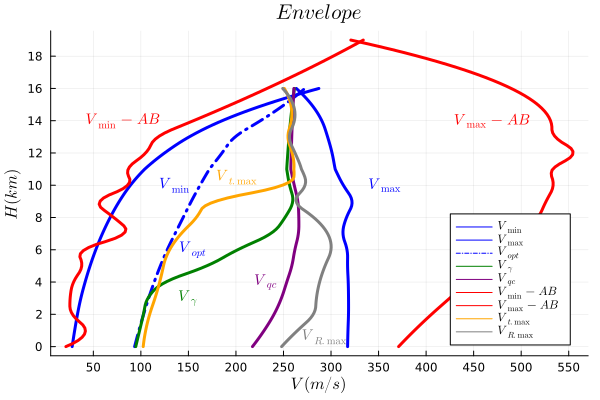

In [41]:
envelope_V_RT = plot(size=(600, 400), dpi=200)

plot!(
    pfm[:mach_min_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{\\min}\$"
)

plot!(
    pfm[:mach_max_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{\\max}\$"
)

plot!(
    pfm[:mach_opt_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:blue,
    label="\$V_{opt}\$",
    linestyle=:dashdot
)
plot!(
    pfm[:mach_gamma_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:green,
    label="\$V_{\\gamma}\$"
)
plot!(
    pfm[:mach_qc_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:purple,
    label="\$V_{qc}\$"
)



plot!(
    pfm[:machAB_min_alt_func].(height_envelope2) .* atm.a.(height_envelope2),
    height_envelope2 ./ km,
    color=:red,
    lw=3,
    label="\$V_{\\min}-AB\$"
)

plot!(
    pfm[:machAB_max_alt_func].(height_envelope2) .* atm.a.(height_envelope2),
    height_envelope2 ./ km,
    lw=3,
    color=:red,
    legend=:bottomright,
    label="\$V_{\\max}-AB\$"
)

plot!(
    pfm[:mach_long_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:orange,
    legend=:bottomright,
    label="\$V_{t.\\max}\$"
)

plot!(
    pfm[:mach_far_alt_func].(height_envelope1) .* atm.a.(height_envelope1),
    height_envelope1 ./ km,
    lw=3,
    color=:gray,
    legend=:bottomright,
    label="\$V_{R.\\max}\$"
)




annotate!(
    340, 10,
    ("\$V_{\\max}\$", :blue, 10, :left)
);
annotate!(
    120, 10,
    ("\$V_{\\min}\$", :blue, 10, :left)
);
annotate!(
    170, 6,
    ("\$V_{opt}\$", :blue, 10, :right)
);
annotate!(
    120, 14,
    ("\$V_{\\min}-AB\$", :red, 10, :right)
);
annotate!(
    430, 14,
    ("\$V_{\\max}-AB\$", :red, 10, :left)
);

annotate!(
    140, 3,
    ("\$V_{\\gamma}\$", :green, 10, :left)
);
annotate!(
    220, 4,
    ("\$V_{qc}\$", :purple, 10, :left)
);

annotate!(
    180, 10.5,
    ("\$V_{t.\\max}\$", :orange, 10, :left)
)
annotate!(
    270, 0.6,
    ("\$V_{R.\\max}\$", :gray, 10, :left)
)

xticks!(LinRange(0, 600, 13))
yticks!(LinRange(0, 20, 11))

xlabel!("\$ V(m/s) \$");
ylabel!("\$ H(km) \$")
title!("\$Envelope\$")

plot(envelope_V_RT)

## 4.2. 保存图片

In [43]:
savepath = "..//..//LATEX//image//ch6//"

if isdir(savepath) != true
    mkpath(savepath);
end

savefig(envelope_RT, savepath * "envelope_RT.png");
savefig(envelope_RT, savepath * "envelope_RT.pdf");

savefig(envelope_V_RT, savepath * "envelope_V_RT.png");
savefig(envelope_V_RT, savepath * "envelope_V_RT.pdf");

println("time range finish!");

time range finish!
